# Implementing Univariate Linear Regression

In [24]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
print("Current dir > ",os.getcwd())

Current dir >  C:\J\Work\CT\BluemineRedesign\dev\machinelearning\andrew-ml-course\git\machine-learning-1\linear regression\python\notebooks


In [26]:
path = os.getcwd() + '\data\ex1data1.txt'

In [27]:
print(path)

C:\J\Work\CT\BluemineRedesign\dev\machinelearning\andrew-ml-course\git\machine-learning-1\linear regression\python\notebooks\data\ex1data1.txt


In [28]:
data = pd.read_csv(path,header=None, names=['Population','Profit'])

### Trying out pandas dataframe methods

In [29]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [30]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
Population    97 non-null float64
Profit        97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


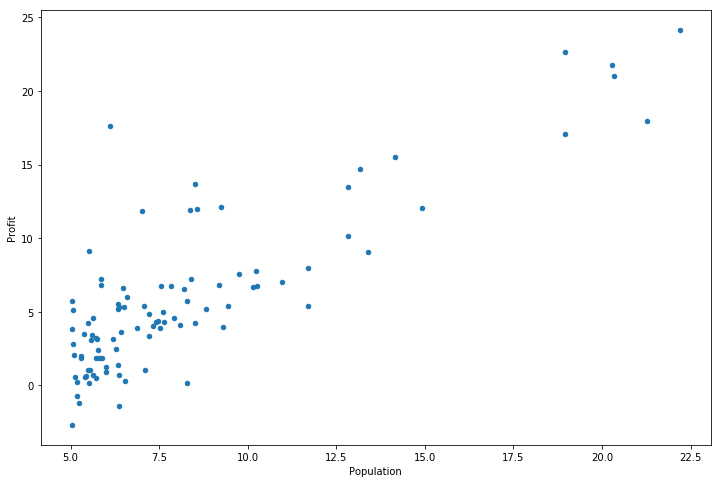

In [9]:
data.plot(kind='scatter',x='Population',y='Profit',figsize=(12,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C1FACA5940>,
      dtype=object)

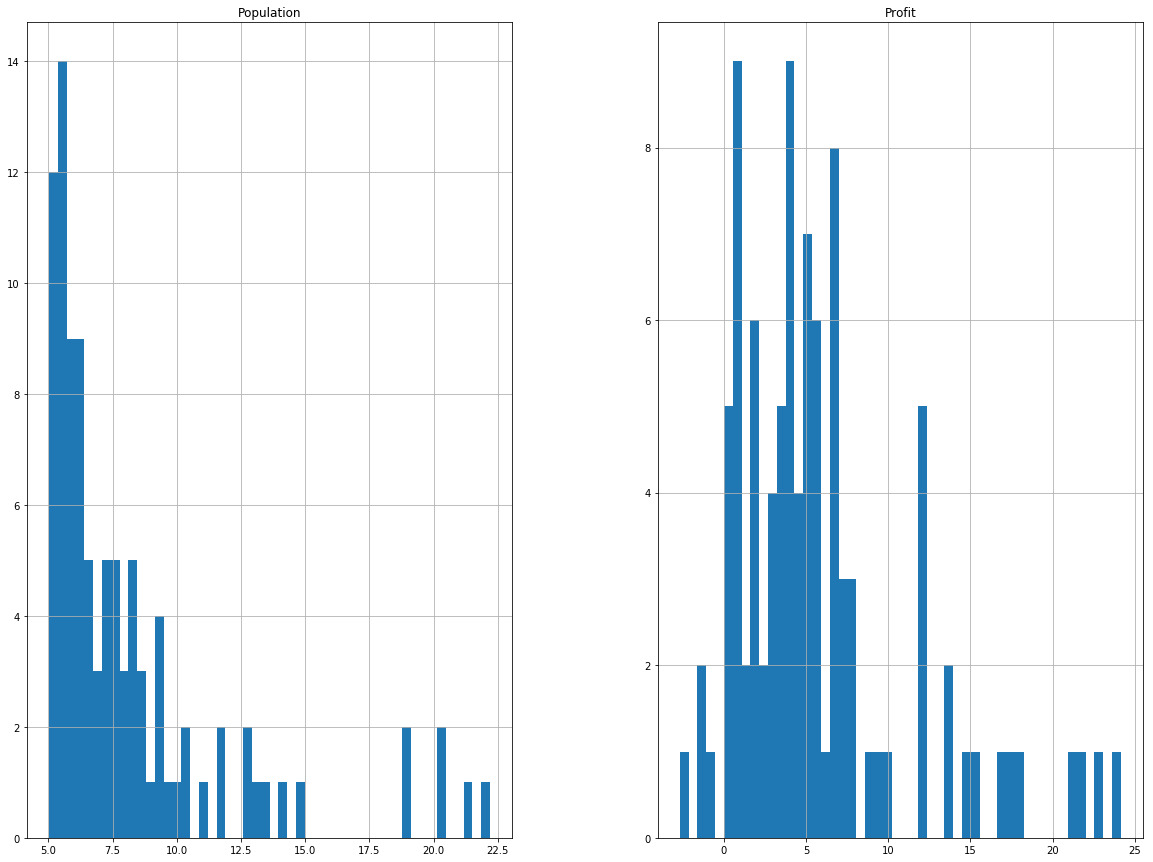

In [10]:
data.hist(bins=50, figsize=(20,15))

### computeCost method

In [12]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y),2)
    return np.sum(inner) / (2*len(X))

#### inserting x0 of 1s into feature matrix

In [34]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [36]:
data.insert(0,'Ones',1)

In [37]:
data.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [86]:
cols = data.shape[1]
print("Number of columns in data matrix: ",cols)

Number of columns in data matrix:  3


#### Slicing out a sub data frame 

In [114]:
X = data.iloc[:,0:cols-1]

In [94]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [120]:
y = data.iloc[:,cols-1:cols]

In [121]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


##### Converting dataframe to numpy matrix

In [115]:
X[:5] # top 5 rows of dataframe

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [116]:
X = np.matrix(X.values)

In [117]:
X[:5] # get top 5 rows of matrix

matrix([[1.    , 6.1101],
        [1.    , 5.5277],
        [1.    , 8.5186],
        [1.    , 7.0032],
        [1.    , 5.8598]])

In [122]:
y[:5] #top 5 rows of data frame

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [123]:
y = np.matrix(y.values)

In [124]:
y[:5] #top 5 rows of matrix

matrix([[17.592 ],
        [ 9.1302],
        [13.662 ],
        [11.854 ],
        [ 6.8233]])

In [178]:
theta = np.matrix(np.array([0,0]))

In [180]:
theta # print the thetas matrix

matrix([[1, 1]])

In [167]:
X.shape

(97, 2)

In [172]:
len(X) #length of X or rows 

97

In [173]:
X.shape[0] #rows

97

In [181]:
theta.shape

(1, 2)

In [182]:
theta.T.shape

(2, 1)

In [130]:
y.shape

(97, 1)

In [183]:
computeCost(X,y,theta)

10.266520491383504

#### unravelling computeCost method() 
##### START

In [153]:
Z = X * theta.T

In [154]:
Z.shape

(97, 1)

In [155]:
y.shape

(97, 1)

In [156]:
A = Z - y

In [157]:
A.shape

(97, 1)

In [158]:
Z[:5]

matrix([[0.],
        [0.],
        [0.],
        [0.],
        [0.]])

In [159]:
y[:5]

matrix([[17.592 ],
        [ 9.1302],
        [13.662 ],
        [11.854 ],
        [ 6.8233]])

In [160]:
A[:5] # A = Z - y

matrix([[-17.592 ],
        [ -9.1302],
        [-13.662 ],
        [-11.854 ],
        [ -6.8233]])

In [161]:
inner1 = np.power( A ,2)

In [162]:
inner1[:5]

matrix([[309.478464  ],
        [ 83.36055204],
        [186.650244  ],
        [140.517316  ],
        [ 46.55742289]])

In [152]:
inner1.shape

(97, 1)

In [170]:
sum1 = np.sum(inner1)

In [171]:
sum1

6222.110372226401

In [175]:
total1 = (sum) / (2*len(X))

In [177]:
total1

32.072733877455676

#### unravelling computeCost method() 
##### END

## Gradient Descent

In [164]:
def gradientDescent(X, y, theta, alpha, iters):  
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)

    for i in range(iters):
        error = (X * theta.T) - y

        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))

        theta = temp
        cost[i] = computeCost(X, y, theta)

    return theta, cost

In [165]:
alpha = 0.0003
iters = 100000

# perform gradient descent to "fit" the model parameters
g, cost = gradientDescent(X, y, theta, alpha, iters)  
g,cost

(matrix([[-3.87796705,  1.19124405]]),
 array([30.79806324, 29.58549432, 28.43200115, ...,  4.47700027,
         4.47700027,  4.47700027]))

In [166]:
computeCost(X, y, g)  


4.477000265739866

Text(0.5,1,'Predicted Profit vs. Population Size')

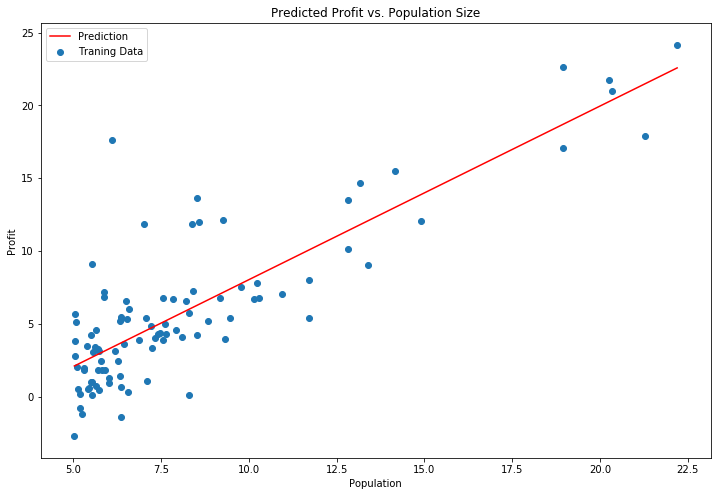

In [167]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)  
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(x, f, 'r', label='Prediction')  
ax.scatter(data.Population, data.Profit, label='Traning Data')  
ax.legend(loc=2)  
ax.set_xlabel('Population')  
ax.set_ylabel('Profit')  
ax.set_title('Predicted Profit vs. Population Size')  

Text(0.5,1,'Error vs. Training Epoch')

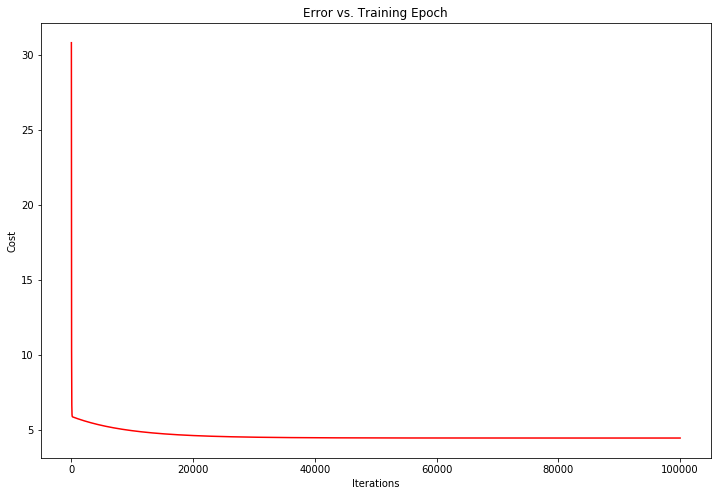

In [168]:
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  